In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from get_coords import domains, get_coords
from structure import Structure
from G_phi_psi import make_distmap, calc_dihedral

from optimize import *
%matplotlib widget

In [2]:
coords_real = get_coords('16pkA01')

phi = torch.load('16pkA01_phi.pt')
psi = torch.load('16pkA01_psi.pt')

phi = np.radians(phi[1:])
psi = np.radians(psi[:-1])

phi.requires_grad_(True)
psi.requires_grad_(True)

seq = domains['16pkA01'][2]

# real distmap
c = []
for i in coords_real:
    if i[3] == 'CA' and i[2] == 'G':
        c.append(i[4:])
    elif i[3] == 'CB':
        c.append(i[4:])
        
c = torch.tensor(c, dtype=torch.float)

dist_map_real = make_distmap(c)

In [3]:
G_16pk = Structure(phi, psi, dist_map_real, seq)

In [4]:
G_16pk.G()

tensor([[ 0.0000,  5.5894,  8.7316,  ..., 18.3036, 14.8335, 19.4084],
        [ 0.0000,  0.0000,  5.6880,  ..., 16.7280, 13.6736, 16.9645],
        [ 0.0000,  0.0000,  0.0000,  ..., 12.2200, 10.5035, 13.8901],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  4.9464,  6.1522],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  5.7634],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<CopySlices>)

In [5]:
G_16pk.visualize_structure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
cl, cb = G_16pk.G_full()

In [15]:
ph = []
for i in range(0, len(cl)-3, 3):
    ph.append(calc_dihedral(cl[i:(i+4)]))

In [20]:
psi

tensor([-0.7505,  2.5133,  2.4609,  2.9671, -0.5934, -0.3142,  0.0698,  2.6180,
         2.0595, -0.2618,  2.1293,  0.0000,  2.5307,  1.9199,  2.0944,  2.0769,
         2.0944,  1.8326,  2.8798,  1.7104,  0.4363,  1.2217,  2.6704,  2.3387,
         2.4784,  2.1293,  0.6632,  0.0175,  2.4260,  2.2340, -0.0698,  1.8850,
         0.2443, -0.8203, -0.5934, -0.7679, -0.7156, -0.4189, -0.3142, -0.8552,
        -0.6981, -0.7854, -0.7330, -0.6807, -0.8029, -0.8727, -0.7505, -0.6283,
        -0.0349,  0.3840, -3.0543,  2.7751,  2.3038,  1.7977,  2.3736,  2.3736,
         2.9845,  2.8100,  2.2340, -2.6878,  1.2217,  2.7227, -0.9076,  2.7402,
         2.5831,  2.4609, -0.6109, -0.5934, -0.1920, -0.7854, -0.9425, -0.9599,
        -0.8378, -0.5760, -0.6807, -0.1571, -0.0175,  2.9496,  2.0769,  2.0944,
         0.1396,  2.4609,  1.9897, -0.7505, -0.4363,  0.3491,  2.5482,  0.0349,
        -0.7679, -0.4363, -0.6632, -0.8029, -0.8029, -0.6981, -0.7330, -0.7505,
        -0.7156, -0.6632, -0.3491,  0.71

In [23]:
np.round(np.array(ph), 4)

array([-0.7505,  2.5133,  2.4609,  2.9671, -0.5934, -0.3142,  0.0698,
        2.618 ,  2.0595, -0.2618,  2.1293, -0.    ,  2.5307,  1.9199,
        2.0944,  2.0769,  2.0944,  1.8326,  2.8798,  1.7104,  0.4363,
        1.2217,  2.6704,  2.3387,  2.4784,  2.1293,  0.6632,  0.0175,
        2.426 ,  2.234 , -0.0698,  1.885 ,  0.2443, -0.8203, -0.5934,
       -0.7679, -0.7156, -0.4189, -0.3142, -0.8552, -0.6981, -0.7854,
       -0.733 , -0.6807, -0.8029, -0.8727, -0.7505, -0.6283, -0.0349,
        0.384 , -3.0543,  2.7751,  2.3038,  1.7977,  2.3736,  2.3736,
        2.9845,  2.81  ,  2.234 , -2.6878,  1.2217,  2.7227, -0.9076,
        2.7402,  2.5831,  2.4609, -0.6109, -0.5934, -0.192 , -0.7854,
       -0.9425, -0.9599, -0.8378, -0.576 , -0.6807, -0.1571, -0.0175,
        2.9496,  2.0769,  2.0944,  0.1396,  2.4609,  1.9897, -0.7505,
       -0.4363,  0.3491,  2.5482,  0.0349, -0.7679, -0.4363, -0.6632,
       -0.8029, -0.8029, -0.6981, -0.733 , -0.7505, -0.7156, -0.6632,
       -0.3491,  0.7

In [24]:
l = loss(td, dist_map_real)

In [26]:
l.backward()

In [16]:
G_16pk.phi.grad

In [5]:
s, h = optimize(G_16pk, iterations=2, lr=1e-1)

Iteration 0, Loss: 74858.0546875
Iteration 1, Loss: 78932.1796875


In [ ]:
torch.std

# Small Protein - 1a02F00

In [2]:
def visualize_structure(backbone, cbeta_coords, seq):
    
    """Visualizes the entire structure: backbone + C-beta atoms
    
    In the first step generates a list of residue coordinates:
        If Glycin: only N, CA, C atoms are present.
        Else: N, CA, CB, CA, C (the CA is there twice to make the plotting easier)
    """
    
    fig = plt.figure()
    
    entire_structure = torch.empty((len(backbone) + 2 * len(cbeta_coords), 3))
    
    it = 0
    cb_it = 0
    for i in range(len(seq)):
        N, CA, C = backbone[(3 * i):(3 * i + 3)]
        
        if seq[i] != 'G':
            CB = cbeta_coords[cb_it]
            cb_it += 1
            entire_structure[it:(it+5)] = torch.cat([N, CA, CB, CA, C]).view((5, 3))
            it += 5
        else:
            entire_structure[it:(it+3)] = torch.cat([N, CA, C]).view((3, 3))
            it += 3
    #return entire_structure       
    c = entire_structure.data.numpy()

    ax = fig.gca(projection='3d')
    ax.plot(c[:, 0], c[:, 1], c[:, 2])

    #ax.scatter(c[:, 0], c[:, 1], c[:, 2], s=100)

In [3]:
coords = get_coords('1a02F00')

backbone = torch.from_numpy(coords[:, 4:][coords[:, 3] != 'CB'].astype(np.float))
cbeta = torch.from_numpy(coords[:, 4:][coords[:, 3] == 'CB'].astype(np.float))

phi = torch.load('1a02F00_phi.pt')
psi = torch.load('1a02F00_psi.pt')

phi = np.radians(phi[1:])
psi = np.radians(psi[:-1])

phi.requires_grad_(True)
psi.requires_grad_(True)

with open('1a02F00.fasta') as f:
    f.readline()
    seq = f.readline()

/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4375.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4395.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 4413.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4459.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 4462.
  PDBConstructionWarning)


In [4]:
# real distmap
c = []
for i in coords:
    if i[3] == 'CA' and i[2] == 'G':
        c.append(i[4:])
    elif i[3] == 'CB':
        c.append(i[4:])
        
c = torch.tensor(c, dtype=torch.float)

dist_map_real = make_distmap(c)

In [6]:
plt.imshow(dist_map_real, cmap='viridis_r')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
visualize_structure(backbone, cbeta, seq)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
G_1a02 = Structure(phi, psi, dist_map_real, seq)

In [9]:
G_1a02.visualize_structure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Messing it up

In [22]:
phi = torch.load('1a02F00_phi.pt')
psi = torch.load('1a02F00_psi.pt')

phi = np.radians(phi[1:])
psi = np.radians(psi[:-1])

phi += torch.randn(len(phi)) 
psi += torch.randn(len(phi))

phi.requires_grad_(True)
psi.requires_grad_(True)

G_messedup = Structure(phi, psi, dist_map_real, seq)

In [20]:
s, l, h = optimize(G_messedup, 20, lr=1e-2, lr_decay=2, verbose=10)

Iteration 0, Loss: inf


UnboundLocalError: local variable 'best_structure' referenced before assignment

In [21]:
G_messedup.phi

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan], dtype=torch.float64, requires_grad=True)

In [18]:
np.inf > 5

True

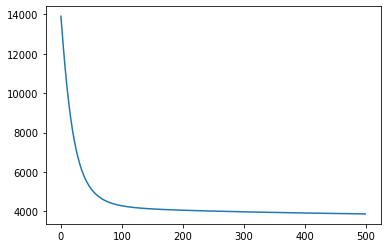

In [11]:
plt.plot(h[:, 0], h[:, 1]);

In [13]:
s.visualize_structure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [1]:
import torch
import torch.nn.functional as F

In [19]:
B = 1

dist_pred = F.log_softmax(torch.rand((B, 32, 64, 64)), dim=1)
ss_pred = F.log_softmax(torch.rand((B, 8, 64)), dim=1)
phi_pred = F.log_softmax(torch.rand((B, 37, 64)), dim=1)
psi_pred = F.log_softmax(torch.rand((B, 37, 64)), dim=1)

dist = torch.randint(0, 31, (64, 64), dtype=torch.int64)
#ss = torch.randint(0, 8, (64), dtype=torch.int64)
#phi = torch.randint(0, 8, (64), dtype=torch.int64)
#psi = torch.randint(0, 8, (64), dtype=torch.int64)

#loss = 10 * criterion(dist_pred, dist)
#loss += 2 * criterion(ss_pred, ss)
#loss += 2 * criterion(phi_pred, phi)
#loss += 2 * criterion(psi_pred, psi)

#print(loss)